In [1]:
import pandas as pd
import numpy as np
import re
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = 'leerwohnungen/liste/gpzuerich.xlsx'

In [3]:
df_leer = pd.read_excel(path, delimiter=',')

In [4]:
df_leer.shape

(176, 38)

In [5]:
df_leer.columns

Index([     'BFS_NR', 'GEBIET_NAME',          2019,          2018,
                2017,          2016,          2015,          2014,
                2013,          2012,          2011,          2010,
                2009,          2008,          2007,          2006,
                2005,          2004,          2003,          2002,
                2001,          2000,          1999,          1998,
                1997,          1996,          1995,          1994,
                1993,          1992,          1991,          1990,
                1989,          1988,          1987,          1986,
                1985,          1984],
      dtype='object')

In [6]:
df_leer["GEBIET_NAME"].unique()

array(['Adlikon', 'Adliswil', 'Aesch ZH', 'Aeugst a.A.', 'Affoltern a.A.',
       'Altikon', 'Andelfingen', 'Bachenbülach', 'Bachs', 'Bäretswil',
       'Bassersdorf', 'Bauma', 'Bauma (bis 2014)', 'Benken', 'Berg a.I.',
       'Birmensdorf', 'Bonstetten', 'Boppelsen', 'Brütten', 'Bubikon',
       'Buch a.I.', 'Buchs', 'Bülach', 'Dachsen', 'Dägerlen', 'Dällikon',
       'Dänikon', 'Dättlikon', 'Dielsdorf', 'Dietikon', 'Dietlikon',
       'Dinhard', 'Dorf', 'Dübendorf', 'Dürnten', 'Egg', 'Eglisau',
       'Elgg', 'Elgg (bis 2017)', 'Ellikon a.d.Th.', 'Elsau', 'Embrach',
       'Erlenbach', 'Fällanden', 'Fehraltorf', 'Feuerthalen',
       'Fischenthal', 'Flaach', 'Flurlingen', 'Freienstein-Teufen',
       'Geroldswil', 'Glattfelden', 'Gossau', 'Greifensee', 'Grüningen',
       'Hagenbuch', 'Hausen a.A.', 'Hedingen', 'Henggart', 'Herrliberg',
       'Hettlingen', 'Hinwil', 'Hirzel (bis 2017)', 'Hittnau',
       'Hochfelden', 'Hofstetten (bis 2017)', 'Hombrechtikon', 'Horgen',
       'Horge

In [7]:
df_leer.head(2)

,BFS_NR,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,21,Adlikon,0.68,0.34,1.79,0.72,2.30,0.82,1.69,0.85,...,0.54,2.79,2.30,0.0,0.61,1.27,2.60,2.67,3.62,1.49
1,131,Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,...,0.91,0.49,0.03,0.0,0.00,0.08,0.29,0.00,0.28,0.10


In [8]:
df_leer.pop("BFS_NR")

0       21
1      131
2      241
3        1
4        2
      ... 
171    230
172    231
173    161
174    160
175    261
Name: BFS_NR, Length: 176, dtype: int64

In [9]:
df_leer

,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1993,1992,1991,1990,1989,1988,1987,1986,1985,1984
0,Adlikon,0.68,0.34,1.79,0.72,2.30,0.82,1.69,0.85,0.43,...,0.54,2.79,2.30,0.00,0.61,1.27,2.60,2.67,3.62,1.49
1,Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,1.25,...,0.91,0.49,0.03,0.00,0.00,0.08,0.29,0.00,0.28,0.10
2,Aesch ZH,2.44,4.38,0.83,6.12,1.08,1.09,1.17,0.41,1.49,...,0.77,0.00,0.00,0.00,0.00,0.00,0.00,3.70,0.00,0.63
3,Aeugst a.A.,5.65,1.55,2.60,2.15,2.05,1.60,0.47,0.12,1.30,...,0.00,1.06,0.64,0.00,0.00,0.30,0.00,0.31,0.32,0.64
4,Affoltern a.A.,1.07,1.46,1.21,0.77,0.82,0.59,0.42,0.62,0.45,...,0.00,0.16,0.08,0.08,0.13,0.27,0.11,0.37,0.64,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Winterthur,0.75,0.55,0.66,0.59,0.58,0.20,0.15,0.16,0.24,...,0.23,0.15,0.10,0.12,0.11,0.10,0.31,0.35,0.53,0.34
172,Zell,0.36,0.70,0.96,0.30,0.54,0.11,1.15,0.24,0.57,...,0.00,0.00,0.06,0.00,0.13,1.25,0.73,0.13,0.00,0.40
173,Zollikon,1.15,1.35,1.80,1.26,1.37,0.96,0.84,0.93,0.30,...,0.13,0.02,0.13,0.02,0.00,0.02,0.08,0.04,0.29,0.16
174,Zumikon,1.91,2.12,1.92,1.15,1.36,1.32,1.46,0.90,1.08,...,0.00,0.00,0.00,0.00,0.00,0.00,0.42,0.00,0.00,0.00


In [10]:
df_leer[2019].max()

5.65

In [11]:
df_leer.columns

Index(['GEBIET_NAME',          2019,          2018,          2017,
                2016,          2015,          2014,          2013,
                2012,          2011,          2010,          2009,
                2008,          2007,          2006,          2005,
                2004,          2003,          2002,          2001,
                2000,          1999,          1998,          1997,
                1996,          1995,          1994,          1993,
                1992,          1991,          1990,          1989,
                1988,          1987,          1986,          1985,
                1984],
      dtype='object')

In [12]:
jahre = [('GEBIET_NAME'),2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,
        2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990]

In [13]:
df_leer[jahre].head(10)

,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,Adlikon,0.68,0.34,1.79,0.72,2.30,0.82,1.69,0.85,0.43,...,0.49,1.53,2.58,2.60,0.00,0.00,0.54,2.79,2.30,0.00
1,Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,1.25,...,1.15,1.16,0.71,1.00,1.23,0.36,0.91,0.49,0.03,0.00
2,Aesch ZH,2.44,4.38,0.83,6.12,1.08,1.09,1.17,0.41,1.49,...,0.71,1.43,2.38,0.96,1.45,0.51,0.77,0.00,0.00,0.00
3,Aeugst a.A.,5.65,1.55,2.60,2.15,2.05,1.60,0.47,0.12,1.30,...,0.58,0.78,0.78,0.79,0.40,2.05,0.00,1.06,0.64,0.00
4,Affoltern a.A.,1.07,1.46,1.21,0.77,0.82,0.59,0.42,0.62,0.45,...,0.37,0.96,0.38,2.06,0.35,0.44,0.00,0.16,0.08,0.08
5,Altikon,0.31,0.63,1.62,0.33,0.69,0.00,0.00,0.37,0.00,...,2.28,3.77,2.42,4.48,1.00,1.01,2.53,1.55,0.00,0.00
6,Andelfingen,0.99,1.19,1.39,1.01,0.61,0.93,0.88,0.77,0.72,...,1.31,0.91,1.68,0.31,0.31,0.48,0.00,0.16,0.17,0.16
7,Bachenbülach,1.13,1.08,0.97,1.03,1.11,1.00,0.11,0.73,1.48,...,0.60,0.46,1.33,2.28,0.81,0.17,0.44,0.63,0.00,0.00
8,Bachs,2.71,1.40,0.70,0.00,0.35,0.36,0.00,0.37,0.38,...,0.00,0.00,1.46,0.00,0.50,0.00,1.04,0.54,0.00,0.00
9,Bäretswil,1.42,1.34,0.31,0.83,0.44,0.36,0.36,0.23,0.28,...,1.54,0.30,0.31,0.25,0.13,0.26,0.20,0.47,0.41,0.31


In [14]:
df_jahre = df_leer[jahre]

In [15]:
df_jahre[(df_jahre['GEBIET_NAME'] == 'Adliswil') | (df_jahre['GEBIET_NAME'] == 'Thalwil')\
        | (df_jahre['GEBIET_NAME'] == 'Rüschlikon') | (df_jahre['GEBIET_NAME'] == 'Kilchberg')\
        | (df_jahre['GEBIET_NAME'] == 'Oberrieden') | (df_jahre['GEBIET_NAME'] == 'Richterswil')\
        | (df_jahre['GEBIET_NAME'] == 'Langnau a.A.') | (df_jahre['GEBIET_NAME'] == 'Horgen (bis 2017)')\
        | (df_jahre['GEBIET_NAME'] == 'Wädenswil') | (df_jahre['GEBIET_NAME'] == 'Wädenswil (bis 2018)')\
        | (df_jahre['GEBIET_NAME'] == 'Horgen')]
df_horgen1 = df_jahre[(df_jahre['GEBIET_NAME'] == 'Adliswil') | (df_jahre['GEBIET_NAME'] == 'Thalwil')\
        | (df_jahre['GEBIET_NAME'] == 'Rüschlikon') | (df_jahre['GEBIET_NAME'] == 'Kilchberg')\
        | (df_jahre['GEBIET_NAME'] == 'Oberrieden') | (df_jahre['GEBIET_NAME'] == 'Richterswil')\
        | (df_jahre['GEBIET_NAME'] == 'Langnau a.A.') | (df_jahre['GEBIET_NAME'] == 'Horgen (bis 2017)')\
        | (df_jahre['GEBIET_NAME'] == 'Wädenswil') | (df_jahre['GEBIET_NAME'] == 'Wädenswil (bis 2018)')\
        | (df_jahre['GEBIET_NAME'] == 'Horgen')]
df_horgen1

,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,1.25,...,1.15,1.16,0.71,1.00,1.23,0.36,0.91,0.49,0.03,0.00
67,Horgen,0.64,0.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Horgen (bis 2017),NaN,NaN,0.68,0.84,0.88,0.85,1.33,1.15,0.87,...,0.60,0.33,0.35,0.57,0.30,0.48,0.70,0.17,0.01,0.03
77,Kilchberg,0.82,1.16,0.97,1.23,0.99,1.01,0.72,0.22,0.35,...,0.77,0.28,0.48,0.40,0.20,0.37,0.31,0.14,0.23,0.09
83,Langnau a.A.,1.02,0.90,0.55,0.69,0.47,0.70,0.65,0.62,0.62,...,1.02,1.15,0.83,0.35,0.14,0.69,0.15,0.11,0.18,0.11
103,Oberrieden,0.69,0.90,0.96,0.91,1.04,0.46,0.00,0.04,0.33,...,0.09,0.47,0.05,0.14,0.05,0.05,0.05,0.05,0.05,0.00
119,Richterswil,0.88,0.67,0.87,0.49,0.89,0.58,0.73,0.63,0.30,...,2.18,2.03,2.19,1.28,0.74,0.24,0.41,0.10,0.17,0.00
124,Rüschlikon,0.93,0.94,0.98,0.80,0.70,1.00,0.46,0.42,0.20,...,0.31,0.04,0.27,0.50,0.78,0.83,1.25,1.16,0.99,0.05
142,Thalwil,0.41,0.40,0.36,0.41,0.35,0.37,0.35,0.20,0.17,...,0.41,0.54,0.16,0.16,0.00,0.12,0.35,0.16,0.05,0.03
154,Wädenswil,0.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_horgen1.loc[[68],2018] = 0.7
df_horgen1.loc[[68],2019] = 0.64
df_horgen1.loc[[155],2019] = 0.68

/Users/martinsteinegger/.virtualenvs/erstesVE/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [17]:
df_horgen1.drop([67], inplace=True)
df_horgen1.drop([154], inplace=True)

/Users/martinsteinegger/.virtualenvs/erstesVE/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [18]:
df_horgen1.replace({"Wädenswil (bis 2018)":"Wädenswil","Horgen (bis 2017)":"Horgen"})
df_horgen_def = df_horgen1.replace({"Wädenswil (bis 2018)":"Wädenswil","Horgen (bis 2017)":"Horgen"})

In [19]:
df_horgen_def.set_index("GEBIET_NAME",inplace=True)

In [20]:
df_horgen_def

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
GEBIET_NAME,,,,,,,,,,,,,,,,,,,,,
Adliswil,0.75,0.90,0.86,0.65,0.77,0.44,0.89,0.99,1.25,0.71,...,1.15,1.16,0.71,1.00,1.23,0.36,0.91,0.49,0.03,0.00
Horgen,0.64,0.70,0.68,0.84,0.88,0.85,1.33,1.15,0.87,0.31,...,0.60,0.33,0.35,0.57,0.30,0.48,0.70,0.17,0.01,0.03
Kilchberg,0.82,1.16,0.97,1.23,0.99,1.01,0.72,0.22,0.35,1.39,...,0.77,0.28,0.48,0.40,0.20,0.37,0.31,0.14,0.23,0.09
Langnau a.A.,1.02,0.90,0.55,0.69,0.47,0.70,0.65,0.62,0.62,0.48,...,1.02,1.15,0.83,0.35,0.14,0.69,0.15,0.11,0.18,0.11
Oberrieden,0.69,0.90,0.96,0.91,1.04,0.46,0.00,0.04,0.33,0.25,...,0.09,0.47,0.05,0.14,0.05,0.05,0.05,0.05,0.05,0.00
Richterswil,0.88,0.67,0.87,0.49,0.89,0.58,0.73,0.63,0.30,0.29,...,2.18,2.03,2.19,1.28,0.74,0.24,0.41,0.10,0.17,0.00
Rüschlikon,0.93,0.94,0.98,0.80,0.70,1.00,0.46,0.42,0.20,0.41,...,0.31,0.04,0.27,0.50,0.78,0.83,1.25,1.16,0.99,0.05
Thalwil,0.41,0.40,0.36,0.41,0.35,0.37,0.35,0.20,0.17,0.33,...,0.41,0.54,0.16,0.16,0.00,0.12,0.35,0.16,0.05,0.03
Wädenswil,0.68,0.61,0.81,0.50,0.62,1.61,0.66,0.81,0.39,0.63,...,1.17,1.84,1.08,0.99,0.33,0.89,0.73,0.37,0.44,0.34


In [21]:
df_horgen_def.swapaxes("index", "columns")

GEBIET_NAME,Adliswil,Horgen,Kilchberg,Langnau a.A.,Oberrieden,Richterswil,Rüschlikon,Thalwil,Wädenswil
2019,0.75,0.64,0.82,1.02,0.69,0.88,0.93,0.41,0.68
2018,0.90,0.70,1.16,0.90,0.90,0.67,0.94,0.40,0.61
2017,0.86,0.68,0.97,0.55,0.96,0.87,0.98,0.36,0.81
2016,0.65,0.84,1.23,0.69,0.91,0.49,0.80,0.41,0.50
2015,0.77,0.88,0.99,0.47,1.04,0.89,0.70,0.35,0.62
2014,0.44,0.85,1.01,0.70,0.46,0.58,1.00,0.37,1.61
2013,0.89,1.33,0.72,0.65,0.00,0.73,0.46,0.35,0.66
2012,0.99,1.15,0.22,0.62,0.04,0.63,0.42,0.20,0.81
2011,1.25,0.87,0.35,0.62,0.33,0.30,0.20,0.17,0.39
2010,0.71,0.31,1.39,0.48,0.25,0.29,0.41,0.33,0.63


In [22]:
df_hoplot = df_horgen_def.swapaxes("index", "columns")

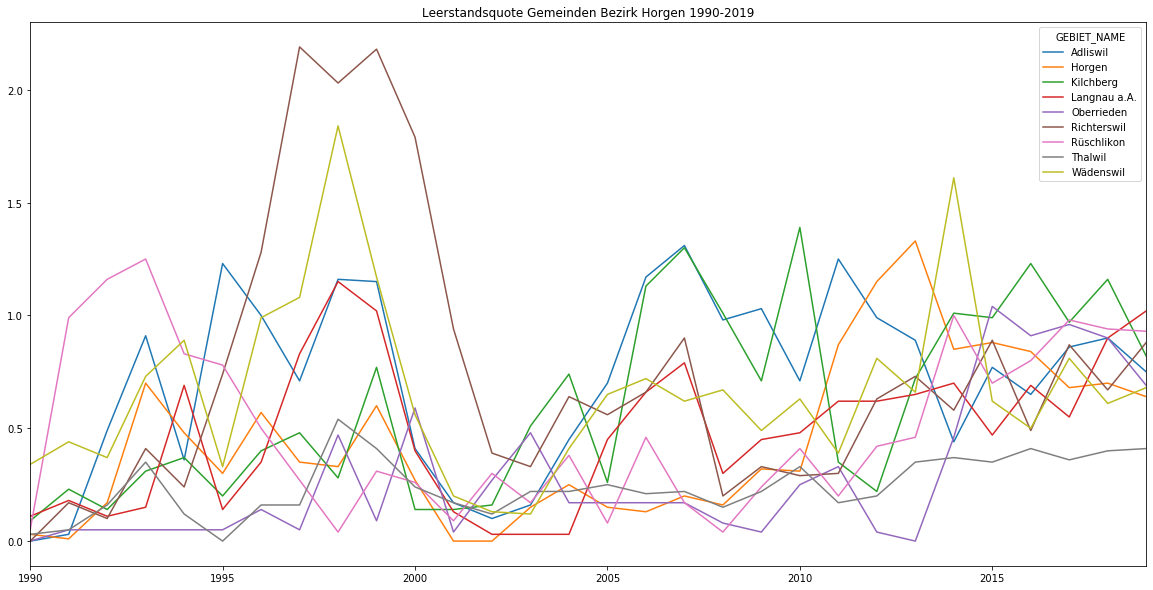

In [23]:
df_hoplot.plot(figsize=(20,10), title="Leerstandsquote Gemeinden Bezirk Horgen 1990-2019")

In [24]:
df_hoplot.iloc[0:30]

GEBIET_NAME,Adliswil,Horgen,Kilchberg,Langnau a.A.,Oberrieden,Richterswil,Rüschlikon,Thalwil,Wädenswil
2019,0.75,0.64,0.82,1.02,0.69,0.88,0.93,0.41,0.68
2018,0.90,0.70,1.16,0.90,0.90,0.67,0.94,0.40,0.61
2017,0.86,0.68,0.97,0.55,0.96,0.87,0.98,0.36,0.81
2016,0.65,0.84,1.23,0.69,0.91,0.49,0.80,0.41,0.50
2015,0.77,0.88,0.99,0.47,1.04,0.89,0.70,0.35,0.62
2014,0.44,0.85,1.01,0.70,0.46,0.58,1.00,0.37,1.61
2013,0.89,1.33,0.72,0.65,0.00,0.73,0.46,0.35,0.66
2012,0.99,1.15,0.22,0.62,0.04,0.63,0.42,0.20,0.81
2011,1.25,0.87,0.35,0.62,0.33,0.30,0.20,0.17,0.39
2010,0.71,0.31,1.39,0.48,0.25,0.29,0.41,0.33,0.63


In [25]:
df_horgen_def[2019].mean()

0.7577777777777778

In [26]:
cols = ['Adliswil','Horgen','Kilchberg','Langnau a.A.','Oberrieden',
        'Richterswil','Rüschlikon','Thalwil','Wädenswil']
df_hoplot['average'] = df_hoplot[cols].mean(axis=1)

In [27]:
df_hoplot['average']
df_average = df_hoplot['average']

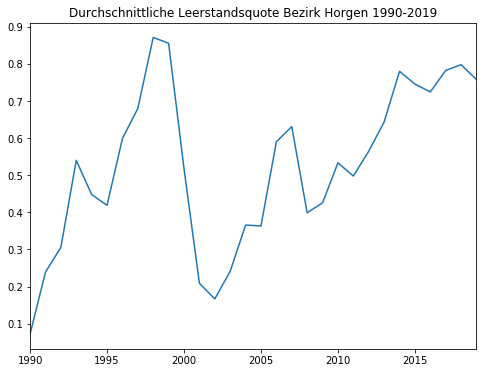

In [28]:
df_average.plot(figsize=(8,6), title="Durchschnittliche Leerstandsquote Bezirk Horgen 1990-2019")

In [29]:
df_jahre[(df_jahre['GEBIET_NAME'] == 'Meilen') | (df_jahre['GEBIET_NAME'] == 'Stäfa')\
        | (df_jahre['GEBIET_NAME'] == 'Männedorf') | (df_jahre['GEBIET_NAME'] == 'Hombrechtikon')\
        | (df_jahre['GEBIET_NAME'] == 'Oetwil a.S.') | (df_jahre['GEBIET_NAME'] == 'Erlenbach')\
        | (df_jahre['GEBIET_NAME'] == 'Zollikon') | (df_jahre['GEBIET_NAME'] == 'Küsnacht')\
        | (df_jahre['GEBIET_NAME'] == 'Uetikon a.S.') | (df_jahre['GEBIET_NAME'] == 'Herrliberg')\
        | (df_jahre['GEBIET_NAME'] == 'Zumikon')]
df_meilen1 = df_jahre[(df_jahre['GEBIET_NAME'] == 'Meilen') | (df_jahre['GEBIET_NAME'] == 'Stäfa')\
        | (df_jahre['GEBIET_NAME'] == 'Männedorf') | (df_jahre['GEBIET_NAME'] == 'Hombrechtikon')\
        | (df_jahre['GEBIET_NAME'] == 'Oetwil a.S.') | (df_jahre['GEBIET_NAME'] == 'Erlenbach')\
        | (df_jahre['GEBIET_NAME'] == 'Zollikon') | (df_jahre['GEBIET_NAME'] == 'Küsnacht')\
        | (df_jahre['GEBIET_NAME'] == 'Uetikon a.S.') | (df_jahre['GEBIET_NAME'] == 'Herrliberg')\
        | (df_jahre['GEBIET_NAME'] == 'Zumikon')]

In [30]:
df_meilen1

,GEBIET_NAME,2019,2018,2017,2016,2015,2014,2013,2012,2011,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
42,Erlenbach,0.98,1.21,1.55,1.51,2.18,2.90,1.48,1.04,2.62,...,0.00,0.00,0.00,0.15,0.60,0.91,0.77,0.31,0.00,0.00
59,Herrliberg,1.07,0.82,1.37,1.37,1.79,0.90,1.02,0.89,0.61,...,0.46,0.66,0.32,0.19,0.48,0.39,1.22,2.36,2.13,0.10
66,Hombrechtikon,1.78,1.59,1.31,1.38,0.69,0.88,0.69,0.94,6.44,...,1.97,0.85,0.85,0.61,1.34,0.97,0.34,0.38,0.04,0.00
81,Küsnacht,3.00,4.27,3.99,2.84,2.17,0.94,1.76,1.55,2.68,...,1.71,2.25,3.35,1.96,1.53,1.02,1.33,1.10,0.82,0.68
87,Männedorf,1.20,1.38,1.46,1.94,1.72,1.21,0.34,0.26,0.71,...,1.57,0.39,0.59,1.16,1.01,0.46,0.09,0.13,0.09,0.09
91,Meilen,2.83,3.13,2.53,3.44,2.03,2.15,2.17,1.67,0.68,...,2.36,3.70,1.72,1.57,1.20,1.13,0.85,0.02,0.56,0.00
108,Oetwil a.S.,1.72,1.95,1.71,1.90,1.24,1.58,0.39,1.47,0.96,...,3.32,4.60,3.44,2.17,1.08,1.69,0.36,0.00,0.15,0.00
136,Stäfa,1.43,2.21,2.42,1.23,1.25,1.17,1.31,1.13,1.72,...,2.32,3.45,3.21,2.34,1.93,0.84,0.72,0.46,0.27,0.45
146,Uetikon a.S.,1.92,2.64,0.98,1.61,1.74,0.78,1.03,1.33,1.37,...,3.06,2.55,2.51,1.62,2.11,2.94,0.00,0.00,0.20,0.33
173,Zollikon,1.15,1.35,1.80,1.26,1.37,0.96,0.84,0.93,0.30,...,0.42,0.41,0.18,0.31,0.27,0.15,0.13,0.02,0.13,0.02


In [31]:
df_meilen1.set_index("GEBIET_NAME",inplace=True)

In [32]:
df_meilen1

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
GEBIET_NAME,,,,,,,,,,,,,,,,,,,,,
Erlenbach,0.98,1.21,1.55,1.51,2.18,2.90,1.48,1.04,2.62,0.32,...,0.00,0.00,0.00,0.15,0.60,0.91,0.77,0.31,0.00,0.00
Herrliberg,1.07,0.82,1.37,1.37,1.79,0.90,1.02,0.89,0.61,0.73,...,0.46,0.66,0.32,0.19,0.48,0.39,1.22,2.36,2.13,0.10
Hombrechtikon,1.78,1.59,1.31,1.38,0.69,0.88,0.69,0.94,6.44,5.80,...,1.97,0.85,0.85,0.61,1.34,0.97,0.34,0.38,0.04,0.00
Küsnacht,3.00,4.27,3.99,2.84,2.17,0.94,1.76,1.55,2.68,1.32,...,1.71,2.25,3.35,1.96,1.53,1.02,1.33,1.10,0.82,0.68
Männedorf,1.20,1.38,1.46,1.94,1.72,1.21,0.34,0.26,0.71,0.19,...,1.57,0.39,0.59,1.16,1.01,0.46,0.09,0.13,0.09,0.09
Meilen,2.83,3.13,2.53,3.44,2.03,2.15,2.17,1.67,0.68,1.21,...,2.36,3.70,1.72,1.57,1.20,1.13,0.85,0.02,0.56,0.00
Oetwil a.S.,1.72,1.95,1.71,1.90,1.24,1.58,0.39,1.47,0.96,1.66,...,3.32,4.60,3.44,2.17,1.08,1.69,0.36,0.00,0.15,0.00
Stäfa,1.43,2.21,2.42,1.23,1.25,1.17,1.31,1.13,1.72,2.14,...,2.32,3.45,3.21,2.34,1.93,0.84,0.72,0.46,0.27,0.45
Uetikon a.S.,1.92,2.64,0.98,1.61,1.74,0.78,1.03,1.33,1.37,1.01,...,3.06,2.55,2.51,1.62,2.11,2.94,0.00,0.00,0.20,0.33


In [33]:
df_meilen1.swapaxes("index", "columns")

GEBIET_NAME,Erlenbach,Herrliberg,Hombrechtikon,Küsnacht,Männedorf,Meilen,Oetwil a.S.,Stäfa,Uetikon a.S.,Zollikon,Zumikon
2019,0.98,1.07,1.78,3.00,1.20,2.83,1.72,1.43,1.92,1.15,1.91
2018,1.21,0.82,1.59,4.27,1.38,3.13,1.95,2.21,2.64,1.35,2.12
2017,1.55,1.37,1.31,3.99,1.46,2.53,1.71,2.42,0.98,1.80,1.92
2016,1.51,1.37,1.38,2.84,1.94,3.44,1.90,1.23,1.61,1.26,1.15
2015,2.18,1.79,0.69,2.17,1.72,2.03,1.24,1.25,1.74,1.37,1.36
2014,2.90,0.90,0.88,0.94,1.21,2.15,1.58,1.17,0.78,0.96,1.32
2013,1.48,1.02,0.69,1.76,0.34,2.17,0.39,1.31,1.03,0.84,1.46
2012,1.04,0.89,0.94,1.55,0.26,1.67,1.47,1.13,1.33,0.93,0.90
2011,2.62,0.61,6.44,2.68,0.71,0.68,0.96,1.72,1.37,0.30,1.08
2010,0.32,0.73,5.80,1.32,0.19,1.21,1.66,2.14,1.01,0.60,0.59


In [34]:
df_meplot = df_meilen1.swapaxes("index", "columns")

In [35]:
df_meplot

GEBIET_NAME,Erlenbach,Herrliberg,Hombrechtikon,Küsnacht,Männedorf,Meilen,Oetwil a.S.,Stäfa,Uetikon a.S.,Zollikon,Zumikon
2019,0.98,1.07,1.78,3.00,1.20,2.83,1.72,1.43,1.92,1.15,1.91
2018,1.21,0.82,1.59,4.27,1.38,3.13,1.95,2.21,2.64,1.35,2.12
2017,1.55,1.37,1.31,3.99,1.46,2.53,1.71,2.42,0.98,1.80,1.92
2016,1.51,1.37,1.38,2.84,1.94,3.44,1.90,1.23,1.61,1.26,1.15
2015,2.18,1.79,0.69,2.17,1.72,2.03,1.24,1.25,1.74,1.37,1.36
2014,2.90,0.90,0.88,0.94,1.21,2.15,1.58,1.17,0.78,0.96,1.32
2013,1.48,1.02,0.69,1.76,0.34,2.17,0.39,1.31,1.03,0.84,1.46
2012,1.04,0.89,0.94,1.55,0.26,1.67,1.47,1.13,1.33,0.93,0.90
2011,2.62,0.61,6.44,2.68,0.71,0.68,0.96,1.72,1.37,0.30,1.08
2010,0.32,0.73,5.80,1.32,0.19,1.21,1.66,2.14,1.01,0.60,0.59


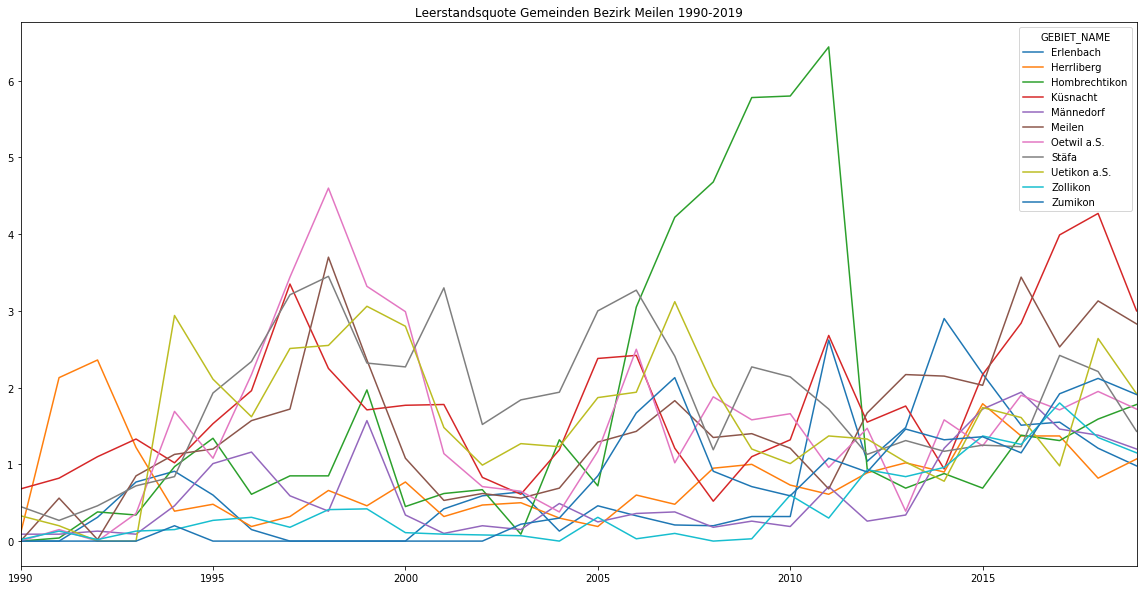

In [36]:
df_meplot.plot(figsize=(20,10), title="Leerstandsquote Gemeinden Bezirk Meilen 1990-2019")

In [37]:
colsmeilen = ['Erlenbach','Herrliberg','Hombrechtikon','Küsnacht','Männedorf',
        'Meilen','Oetwil a.S.','Stäfa','Uetikon a.S.','Zollikon','Zumikon']
df_meplot['average'] = df_meplot[colsmeilen].mean(axis=1)

In [38]:
df_meaverage = df_meplot['average']

In [39]:
df_meplot.loc[2019].mean()

1.7263636363636363

In [40]:
df_meaverage

2019    1.726364
2018    2.060909
2017    1.912727
2016    1.784545
2015    1.594545
2014    1.344545
2013    1.135455
2012    1.100909
2011    1.742727
2010    1.415455
2009    1.422727
2008    1.261818
2007    1.555455
2006    1.600000
2005    1.135455
2004    0.724545
2003    0.600000
2002    0.607273
2001    0.889091
2000    1.143636
1999    1.562727
1998    1.714545
1997    1.470000
1996    1.098182
1995    1.050000
1994    0.972727
1993    0.528182
1992    0.434545
1991    0.399091
1990    0.151818
Name: average, dtype: float64

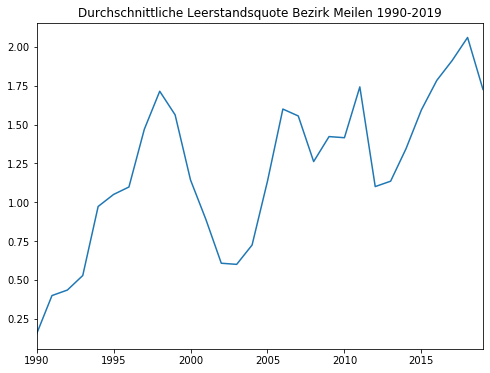

In [41]:
df_meaverage.plot(figsize=(8,6), title="Durchschnittliche Leerstandsquote Bezirk Meilen 1990-2019")

In [42]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

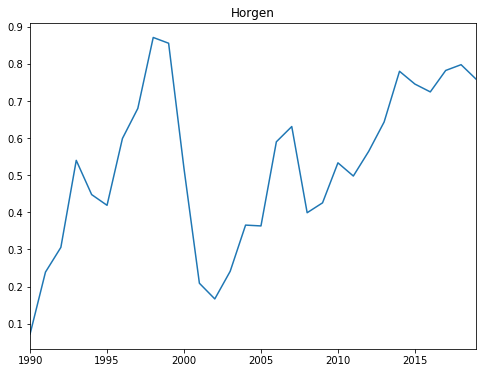

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
df_average.plot(title="Horgen", ax=ax)

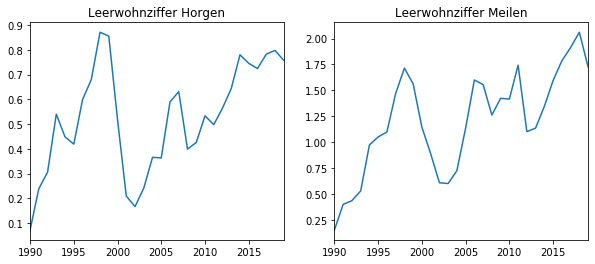

In [44]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df_average.plot(title="Leerwohnziffer Horgen", ax=ax1)
df_meaverage.plot(title="Leerwohnziffer Meilen", ax=ax2)

In [45]:
path = 'leerwohnungen/liste/gpzuerich (1).xlsx'
df_bau = pd.read_excel(path, delimiter=',')

In [46]:
df_bau

,BFS_NR,GEBIET_NAME,2017,2016,2015,2014,2013,2012,2011,2010,...,1980,1979,1978,1977,1976,1975,1974,1973,1972,1971
0,21,Adlikon,1.0,0.0,18.0,17,3,4,2.0,3.0,...,6.0,3.0,4.0,9.0,0.0,2.0,0.0,1.0,0.0,0.0
1,131,Adliswil,6.0,39.0,4.0,53,97,87,593.0,18.0,...,169.0,147.0,143.0,55.0,155.0,306.0,235.0,95.0,110.0,205.0
2,241,Aesch ZH,79.0,27.0,26.0,2,27,20,13.0,6.0,...,22.0,9.0,42.0,4.0,0.0,4.0,18.0,10.0,3.0,8.0
3,1,Aeugst a.A.,7.0,8.0,0.0,2,0,15,2.0,57.0,...,8.0,7.0,7.0,7.0,8.0,5.0,2.0,1.0,0.0,4.0
4,2,Affoltern a.A.,107.0,119.0,83.0,59,165,97,37.0,110.0,...,51.0,46.0,40.0,36.0,63.0,36.0,233.0,135.0,0.0,126.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,230,Winterthur,276.0,744.0,689.0,746,580,301,1561.0,342.0,...,254.0,176.0,397.0,117.0,283.0,649.0,0.0,0.0,0.0,0.0
172,231,Zell,98.0,29.0,22.0,34,50,34,31.0,36.0,...,18.0,15.0,1.0,1.0,1.0,6.0,92.0,35.0,63.0,26.0
173,161,Zollikon,31.0,31.0,24.0,75,48,60,13.0,75.0,...,30.0,28.0,62.0,51.0,73.0,159.0,141.0,92.0,108.0,91.0
174,160,Zumikon,14.0,2.0,15.0,5,4,27,41.0,3.0,...,82.0,62.0,110.0,71.0,65.0,103.0,80.0,59.0,143.0,63.0


In [47]:
jahrebau = [('GEBIET_NAME'),2017,2016,2015,2014,2013,2012,2011,2010,2009,2008,2007,
        2006,2005,2004,2003,2002,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990]
df_bau[jahrebau]
df_jahrebau = df_bau[jahrebau]

In [48]:
df_jahrebau[(df_jahrebau['GEBIET_NAME'] == 'Adliswil') | (df_jahrebau['GEBIET_NAME'] == 'Thalwil')\
        | (df_jahrebau['GEBIET_NAME'] == 'Rüschlikon') | (df_jahrebau['GEBIET_NAME'] == 'Kilchberg')\
        | (df_jahrebau['GEBIET_NAME'] == 'Oberrieden') | (df_jahrebau['GEBIET_NAME'] == 'Richterswil')\
        | (df_jahrebau['GEBIET_NAME'] == 'Langnau a.A.') | (df_jahrebau['GEBIET_NAME'] == 'Horgen (bis 2017)')\
        | (df_jahrebau['GEBIET_NAME'] == 'Wädenswil') | (df_jahrebau['GEBIET_NAME'] == 'Wädenswil (bis 2018)')\
        | (df_jahrebau['GEBIET_NAME'] == 'Horgen')]
df_horgenbau1 = df_jahrebau[(df_jahrebau['GEBIET_NAME'] == 'Adliswil') | (df_jahrebau['GEBIET_NAME'] == 'Thalwil')\
        | (df_jahrebau['GEBIET_NAME'] == 'Rüschlikon') | (df_jahrebau['GEBIET_NAME'] == 'Kilchberg')\
        | (df_jahrebau['GEBIET_NAME'] == 'Oberrieden') | (df_jahrebau['GEBIET_NAME'] == 'Richterswil')\
        | (df_jahrebau['GEBIET_NAME'] == 'Langnau a.A.') | (df_jahrebau['GEBIET_NAME'] == 'Horgen (bis 2017)')\
        | (df_jahrebau['GEBIET_NAME'] == 'Wädenswil') | (df_jahrebau['GEBIET_NAME'] == 'Wädenswil (bis 2018)')\
        | (df_jahrebau['GEBIET_NAME'] == 'Horgen')]
df_horgenbau1

,GEBIET_NAME,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Adliswil,6.0,39.0,4.0,53,97,87,593.0,18.0,20.0,...,79.0,13.0,4.0,248.0,21.0,29.0,36.0,83.0,65.0,46.0
67,Horgen,95.0,61.0,49.0,100,199,36,68.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,Horgen (bis 2017),94.0,61.0,44.0,74,199,36,66.0,154.0,61.0,...,97.0,282.0,47.0,94.0,10.0,44.0,13.0,94.0,13.0,78.0
77,Kilchberg,30.0,65.0,81.0,59,76,62,19.0,30.0,7.0,...,8.0,100.0,21.0,15.0,5.0,21.0,5.0,1.0,47.0,29.0
83,Langnau a.A.,3.0,2.0,24.0,2,10,23,2.0,0.0,48.0,...,59.0,5.0,54.0,66.0,17.0,13.0,9.0,9.0,40.0,4.0
103,Oberrieden,15.0,7.0,7.0,4,9,0,26.0,21.0,32.0,...,19.0,26.0,21.0,19.0,54.0,36.0,26.0,3.0,5.0,4.0
119,Richterswil,72.0,68.0,31.0,24,101,104,97.0,136.0,94.0,...,36.0,63.0,42.0,95.0,85.0,56.0,32.0,12.0,13.0,34.0
124,Rüschlikon,49.0,23.0,11.0,39,39,20,67.0,29.0,9.0,...,8.0,9.0,40.0,4.0,3.0,23.0,6.0,4.0,34.0,3.0
142,Thalwil,114.0,44.0,57.0,24,24,101,54.0,39.0,121.0,...,53.0,199.0,54.0,107.0,20.0,101.0,25.0,52.0,36.0,40.0
154,Wädenswil,136.0,37.0,152.0,126,57,149,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_horgenbau1.fillna(0)

,GEBIET_NAME,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
1,Adliswil,6.0,39.0,4.0,53,97,87,593.0,18.0,20.0,...,79.0,13.0,4.0,248.0,21.0,29.0,36.0,83.0,65.0,46.0
67,Horgen,95.0,61.0,49.0,100,199,36,68.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
68,Horgen (bis 2017),94.0,61.0,44.0,74,199,36,66.0,154.0,61.0,...,97.0,282.0,47.0,94.0,10.0,44.0,13.0,94.0,13.0,78.0
77,Kilchberg,30.0,65.0,81.0,59,76,62,19.0,30.0,7.0,...,8.0,100.0,21.0,15.0,5.0,21.0,5.0,1.0,47.0,29.0
83,Langnau a.A.,3.0,2.0,24.0,2,10,23,2.0,0.0,48.0,...,59.0,5.0,54.0,66.0,17.0,13.0,9.0,9.0,40.0,4.0
103,Oberrieden,15.0,7.0,7.0,4,9,0,26.0,21.0,32.0,...,19.0,26.0,21.0,19.0,54.0,36.0,26.0,3.0,5.0,4.0
119,Richterswil,72.0,68.0,31.0,24,101,104,97.0,136.0,94.0,...,36.0,63.0,42.0,95.0,85.0,56.0,32.0,12.0,13.0,34.0
124,Rüschlikon,49.0,23.0,11.0,39,39,20,67.0,29.0,9.0,...,8.0,9.0,40.0,4.0,3.0,23.0,6.0,4.0,34.0,3.0
142,Thalwil,114.0,44.0,57.0,24,24,101,54.0,39.0,121.0,...,53.0,199.0,54.0,107.0,20.0,101.0,25.0,52.0,36.0,40.0
154,Wädenswil,136.0,37.0,152.0,126,57,149,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_horgenbau1.drop([67], inplace=True)
df_horgenbau1.drop([154], inplace=True)

In [51]:
df_horgenbau1.replace({"Wädenswil (bis 2018)":"Wädenswil","Horgen (bis 2017)":"Horgen"})
df_bauenhorgen = df_horgenbau1.replace({"Wädenswil (bis 2018)":"Wädenswil","Horgen (bis 2017)":"Horgen"})
df_bauenhorgen.set_index("GEBIET_NAME",inplace=True)
df_bauenhorgen.swapaxes("index", "columns")
df_bauenho = df_bauenhorgen.swapaxes("index", "columns")

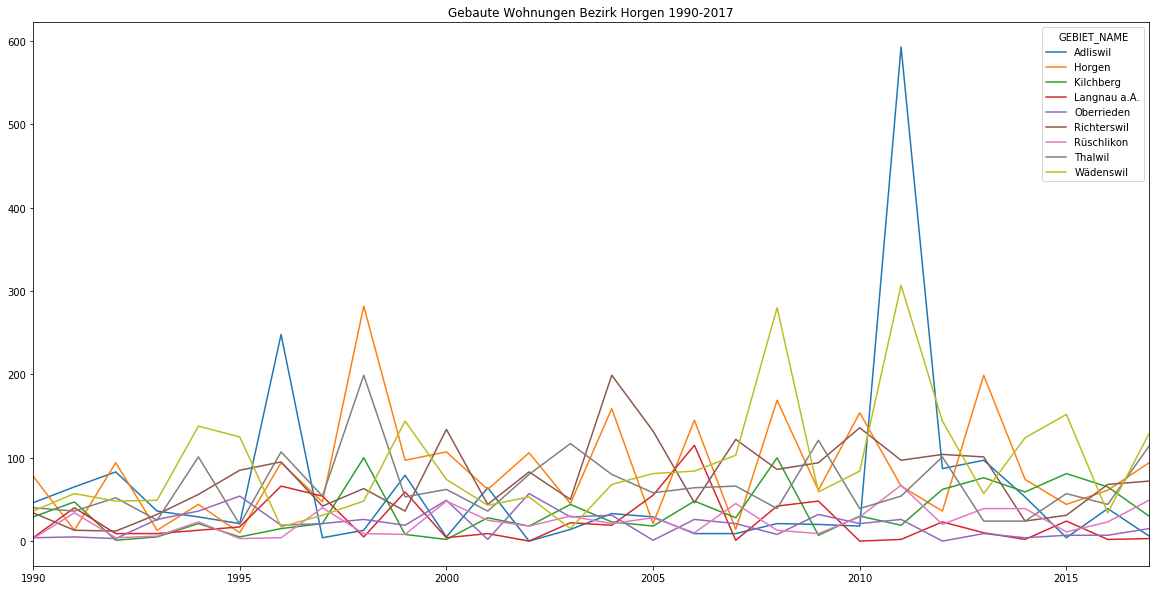

In [52]:
df_bauenho.plot(figsize=(20,10), title="Gebaute Wohnungen Bezirk Horgen 1990-2017")

In [53]:
colshorgen = ['Adliswil','Horgen','Kilchberg','Langnau a.A.',
              'Oberrieden','Richterswil','Rüschlikon','Thalwil','Wädenswil']
df_bauenho['average'] = df_bauenho[colshorgen].sum(axis=1)
df_bautenho = df_bauenho['average']

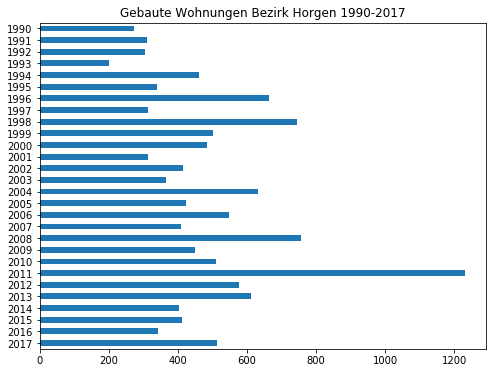

In [54]:
df_bautenho.plot(kind='barh', figsize=(8,6), title="Gebaute Wohnungen Bezirk Horgen 1990-2017")

In [55]:
df_jahrebau[(df_jahre['GEBIET_NAME'] == 'Meilen') | (df_jahre['GEBIET_NAME'] == 'Stäfa')\
        | (df_jahre['GEBIET_NAME'] == 'Männedorf') | (df_jahre['GEBIET_NAME'] == 'Hombrechtikon')\
        | (df_jahre['GEBIET_NAME'] == 'Oetwil a.S.') | (df_jahre['GEBIET_NAME'] == 'Erlenbach')\
        | (df_jahre['GEBIET_NAME'] == 'Zollikon') | (df_jahre['GEBIET_NAME'] == 'Küsnacht')\
        | (df_jahre['GEBIET_NAME'] == 'Uetikon a.S.') | (df_jahre['GEBIET_NAME'] == 'Herrliberg')\
        | (df_jahre['GEBIET_NAME'] == 'Zumikon')]
df_meilenbau1 = df_jahrebau[(df_jahre['GEBIET_NAME'] == 'Meilen') | (df_jahre['GEBIET_NAME'] == 'Stäfa')\
        | (df_jahre['GEBIET_NAME'] == 'Männedorf') | (df_jahre['GEBIET_NAME'] == 'Hombrechtikon')\
        | (df_jahre['GEBIET_NAME'] == 'Oetwil a.S.') | (df_jahre['GEBIET_NAME'] == 'Erlenbach')\
        | (df_jahre['GEBIET_NAME'] == 'Zollikon') | (df_jahre['GEBIET_NAME'] == 'Küsnacht')\
        | (df_jahre['GEBIET_NAME'] == 'Uetikon a.S.') | (df_jahre['GEBIET_NAME'] == 'Herrliberg')\
        | (df_jahre['GEBIET_NAME'] == 'Zumikon')]
df_meilenbau1

,GEBIET_NAME,2017,2016,2015,2014,2013,2012,2011,2010,2009,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
42,Erlenbach,27.0,24.0,1.0,53,32,34,8.0,51.0,12.0,...,33.0,10.0,39.0,18.0,14.0,28.0,23.0,34.0,14.0,7.0
59,Herrliberg,20.0,41.0,13.0,26,45,41,4.0,69.0,7.0,...,93.0,97.0,99.0,46.0,80.0,14.0,8.0,8.0,63.0,21.0
66,Hombrechtikon,18.0,59.0,72.0,35,68,23,62.0,66.0,32.0,...,48.0,16.0,10.0,45.0,4.0,64.0,70.0,5.0,10.0,54.0
81,Küsnacht,44.0,113.0,37.0,54,85,58,25.0,71.0,170.0,...,60.0,19.0,53.0,35.0,19.0,24.0,48.0,45.0,46.0,50.0
87,Männedorf,49.0,114.0,41.0,65,49,38,23.0,121.0,17.0,...,131.0,74.0,52.0,42.0,56.0,192.0,63.0,34.0,9.0,33.0
91,Meilen,117.0,53.0,139.0,62,126,90,102.0,98.0,35.0,...,201.0,95.0,33.0,62.0,35.0,65.0,30.0,23.0,16.0,34.0
108,Oetwil a.S.,46.0,67.0,2.0,28,1,6,51.0,6.0,14.0,...,22.0,42.0,33.0,105.0,36.0,52.0,12.0,5.0,16.0,25.0
136,Stäfa,83.0,117.0,43.0,80,36,15,83.0,144.0,21.0,...,40.0,80.0,197.0,58.0,132.0,80.0,15.0,58.0,21.0,69.0
146,Uetikon a.S.,22.0,30.0,33.0,22,11,61,73.0,0.0,17.0,...,148.0,81.0,85.0,65.0,117.0,45.0,44.0,3.0,6.0,23.0
173,Zollikon,31.0,31.0,24.0,75,48,60,13.0,75.0,25.0,...,35.0,5.0,32.0,38.0,39.0,43.0,59.0,11.0,101.0,18.0


In [56]:
df_meilenbau1.set_index("GEBIET_NAME",inplace=True)
df_meilenbau1.swapaxes("index", "columns")
df_bauenmeilen = df_meilenbau1.swapaxes("index", "columns")

In [57]:
colsmeilen = ['Erlenbach','Herrliberg','Hombrechtikon','Küsnacht','Männedorf',
              'Meilen','Oetwil a.S.','Stäfa','Uetikon a.S.','Zollikon','Zumikon']
df_bauenmeilen['average'] = df_bauenmeilen[colsmeilen].sum(axis=1)
df_bautenmeilen = df_bauenmeilen['average']

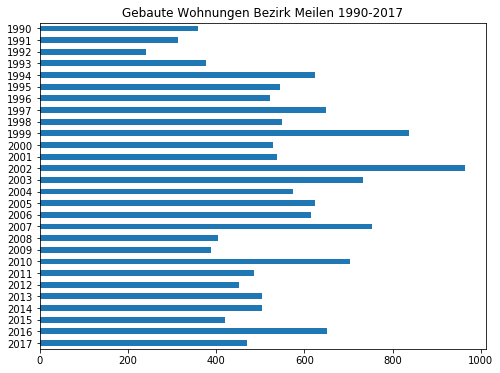

In [58]:
df_bautenmeilen.plot(kind='barh', figsize=(8,6), title="Gebaute Wohnungen Bezirk Meilen 1990-2017")

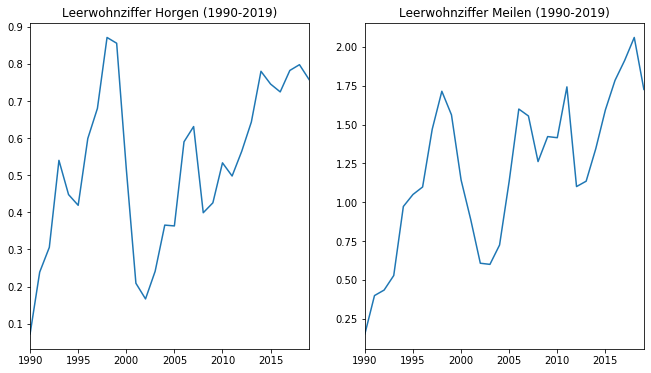

In [59]:
fig = plt.figure(figsize=(11,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df_average.plot(title="Leerwohnziffer Horgen (1990-2019)", ax=ax1)
df_meaverage.plot(title="Leerwohnziffer Meilen (1990-2019)", ax=ax2)

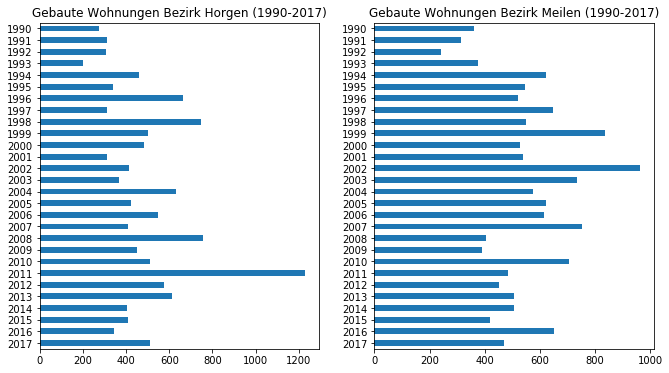

In [60]:
fig = plt.figure(figsize=(11,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
df_bautenho.plot(kind='barh',title="Gebaute Wohnungen Bezirk Horgen (1990-2017)", ax=ax1)
df_bautenmeilen.plot(kind='barh',title="Gebaute Wohnungen Bezirk Meilen (1990-2017)", ax=ax2)

In [61]:
df_combinedleer = pd.DataFrame({'Bezirk Horgen': df_average,'Bezirk Meilen': df_meaverage,})
df_combinedbauen = pd.DataFrame({'Bezirk Horgen': df_bautenho,'Bezirk Meilen': df_bautenmeilen,})

In [62]:
df_combinedleer

,Bezirk Horgen,Bezirk Meilen
2019,0.757778,1.726364
2018,0.797778,2.060909
2017,0.782222,1.912727
2016,0.724444,1.784545
2015,0.745556,1.594545
2014,0.780000,1.344545
2013,0.643333,1.135455
2012,0.564444,1.100909
2011,0.497778,1.742727
2010,0.533333,1.415455


In [63]:
df_combinedbauen

,Bezirk Horgen,Bezirk Meilen
2017,512.0,471.0
2016,343.0,651.0
2015,411.0,420.0
2014,403.0,505.0
2013,612.0,505.0
2012,577.0,453.0
2011,1231.0,485.0
2010,511.0,704.0
2009,451.0,389.0
2008,758.0,405.0


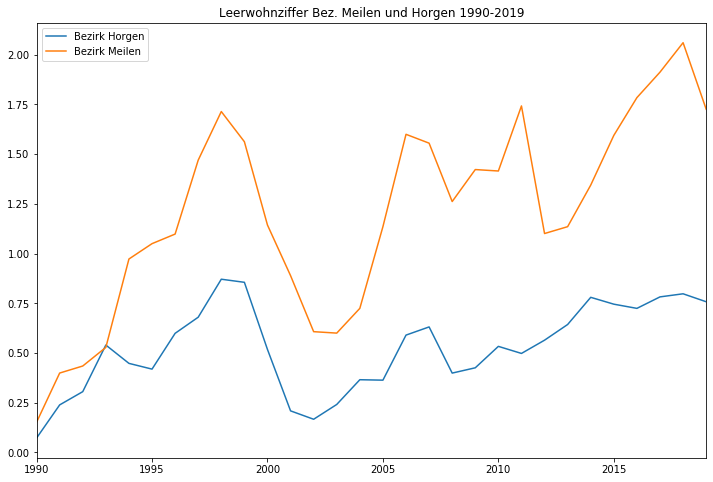

In [64]:
df_combinedleer.plot(figsize=(12,8), title="Leerwohnziffer Bez. Meilen und Horgen 1990-2019")

In [65]:
df_combinedleer.to_csv('leerwohnungen.csv')

In [66]:
df_meplot.to_csv('leermeilen.csv')

In [67]:
df_hoplot.to_csv('leerhorgen.csv')

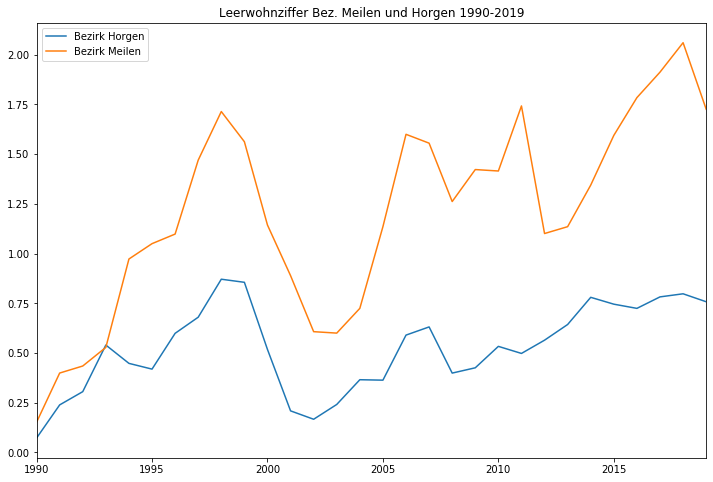

In [68]:
df_combinedleer.plot(figsize=(12,8), title="Leerwohnziffer Bez. Meilen und Horgen 1990-2019").get_figure().savefig('output.png')

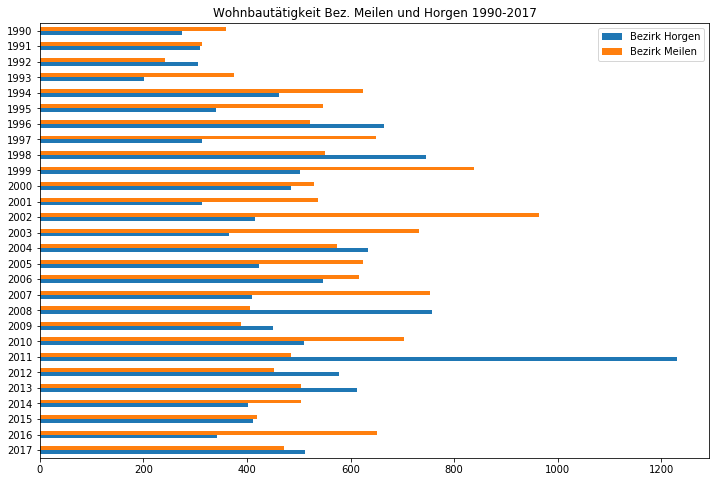

In [69]:
df_combinedbauen.plot(kind='barh', figsize=(12,8), title="Wohnbautätigkeit Bez. Meilen und Horgen 1990-2017").get_figure().savefig('bautätigkeit.png')

In [70]:
df_meilen1

,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
GEBIET_NAME,,,,,,,,,,,,,,,,,,,,,
Erlenbach,0.98,1.21,1.55,1.51,2.18,2.90,1.48,1.04,2.62,0.32,...,0.00,0.00,0.00,0.15,0.60,0.91,0.77,0.31,0.00,0.00
Herrliberg,1.07,0.82,1.37,1.37,1.79,0.90,1.02,0.89,0.61,0.73,...,0.46,0.66,0.32,0.19,0.48,0.39,1.22,2.36,2.13,0.10
Hombrechtikon,1.78,1.59,1.31,1.38,0.69,0.88,0.69,0.94,6.44,5.80,...,1.97,0.85,0.85,0.61,1.34,0.97,0.34,0.38,0.04,0.00
Küsnacht,3.00,4.27,3.99,2.84,2.17,0.94,1.76,1.55,2.68,1.32,...,1.71,2.25,3.35,1.96,1.53,1.02,1.33,1.10,0.82,0.68
Männedorf,1.20,1.38,1.46,1.94,1.72,1.21,0.34,0.26,0.71,0.19,...,1.57,0.39,0.59,1.16,1.01,0.46,0.09,0.13,0.09,0.09
Meilen,2.83,3.13,2.53,3.44,2.03,2.15,2.17,1.67,0.68,1.21,...,2.36,3.70,1.72,1.57,1.20,1.13,0.85,0.02,0.56,0.00
Oetwil a.S.,1.72,1.95,1.71,1.90,1.24,1.58,0.39,1.47,0.96,1.66,...,3.32,4.60,3.44,2.17,1.08,1.69,0.36,0.00,0.15,0.00
Stäfa,1.43,2.21,2.42,1.23,1.25,1.17,1.31,1.13,1.72,2.14,...,2.32,3.45,3.21,2.34,1.93,0.84,0.72,0.46,0.27,0.45
Uetikon a.S.,1.92,2.64,0.98,1.61,1.74,0.78,1.03,1.33,1.37,1.01,...,3.06,2.55,2.51,1.62,2.11,2.94,0.00,0.00,0.20,0.33
